Dataset Preview:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


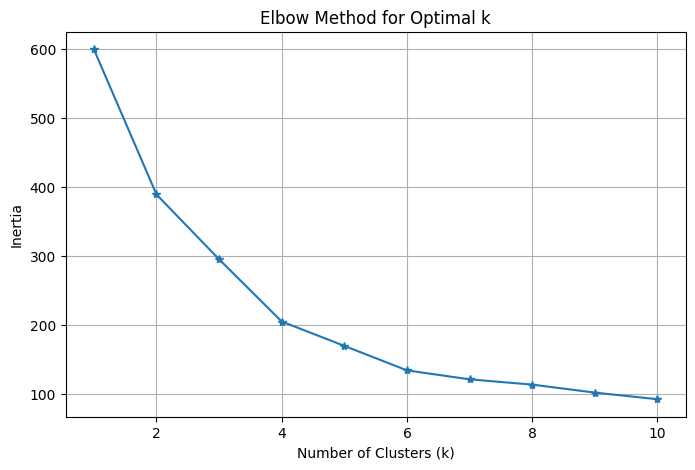

Final inertia for k=5: 169.89149793438582


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load dataset
data = pd.read_csv("D:/RAKESH/AIML/ALL DATA SETS/Mall_Customers.csv")

# Display first rows
print("Dataset Preview:")
print(data.head())

# Select features for clustering (e.g., Age, Annual Income, Spending Score)
X = data.iloc[:, [2, 3, 4]].values   # columns: Age, Annual Income, Spending Score

# Standardize data (good practice for KMeans)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow Method to find optimal number of clusters
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='*')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

# Choose best k (let’s assume k=5 from elbow)
kmeans_final = KMeans(n_clusters=5, init="k-means++", random_state=42)
kmeans_final.fit(X_scaled)

# Print final inertia
print("Final inertia for k=5:", kmeans_final.inertia_)